In [2]:
import json
import pandas as pd
import numpy as np
import re

In [3]:
file_dir = '/Users/Ingrid/Desktop/dataClasswork/Mod8-Movies-ETL/Amazing_Movie_Analysis'


In [4]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')
# chooses 5 random rows from the dataframe
kaggle_metadata.sample(n=5)
#ratings.dtypes

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35809,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,61662,tt0240610,fr,In girum imus nocte et consumimur igni,A Latin palindrome is the title of Guy Debord'...,...,1978-03-12,0.0,100.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,In girum imus nocte et consumimur igni,False,7.5,4.0
25873,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.pattonoswalt.com/,92452,tt1084002,en,Patton Oswalt: Werewolves and Lollipops,This DVD is a recording of the show Patton Osw...,...,2007-07-10,0.0,54.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Werewolves and Lollipops,Patton Oswalt: Werewolves and Lollipops,False,6.9,4.0
23985,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,209244,tt1545754,en,Are You Here,"When Steve Dallas, a womanizing local weatherm...",...,2013-09-07,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friendship... there's nothing in it for anybody.,Are You Here,False,5.0,108.0
29480,False,NaN,0,[],NaN,198044,tt0065703,de,Erste Liebe,"Based on Ivan Turgenev's novella, Erste Liebe ...",...,1970-10-07,0.0,89.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,First Love,False,6.0,2.0
34543,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",NaN,104945,tt0173184,en,Senza sapere niente di lei,Tells a dark story about a young lawyer that f...,...,1969-11-18,0.0,96.0,[],Released,NaN,Without Knowing Anything About Her,False,0.0,0.0


In [5]:
# Cleaning Kaggle Data
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [12]:
# video and adult to boolean
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'



In [14]:
# ID, budget, popularity to numeric
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [16]:
# Release_date to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [17]:
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

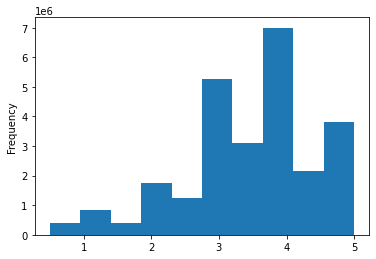

In [20]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()
